In [2]:
import read_data
data = read_data.data

/home/lo/pg/ML/ML-Projekt/read_data.py:29: RuntimeWarning: divide by zero encountered in log10
  stft = 10 * np.log10(stft)


Daten liegen in dem pandas.DataFrame data. Werte in data['arr]'. Klassen in data['target']

In [3]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.concatenate(data['arr'].values).reshape(-1, 256*128)
print(X.shape)
print(X)

y = data['target']
print(y.shape)
print(y)

(5700, 32768)
[[0.53835804 0.53948557 0.54231415 ... 0.62427359 0.63278792 0.63736611]
 [0.57025891 0.55897285 0.55574293 ... 0.60824552 0.61591889 0.62003003]
 [0.57360337 0.56940564 0.5652321  ... 0.69723126 0.70560226 0.71010212]
 ...
 [0.56742371 0.56886997 0.5683285  ... 0.61438716 0.62240744 0.62671828]
 [0.5511074  0.550678   0.55123278 ... 0.6270316  0.63564807 0.64028952]
 [0.58072485 0.58205473 0.58082764 ... 0.68989731 0.69810868 0.70252647]]
(5700,)
0         0
1         0
2         0
3         0
4         0
         ..
44129    18
44130    18
44131    18
44132    18
44133    18
Name: target, Length: 5700, dtype: int64


Dimensionsreduktion mit PCA
Anteil der erklärten Varianz für einige Dimensionen

In [8]:
dims = [1, 2, 3, 5, 10, 100, 1000]
X_pca = []

for dim in dims:
    pca = PCA(n_components=dim)
    transformed = pca.fit_transform(X)
    X_pca.append(transformed)
    print(f"{dim} Hauptkomponente(n): {sum(pca.explained_variance_ratio_)} variance explained")

1 Hauptkomponente(n): 0.5748846237549935 variance explained
2 Hauptkomponente(n): 0.6510424094237345 variance explained
3 Hauptkomponente(n): 0.6992218163305904 variance explained
5 Hauptkomponente(n): 0.7529995894306687 variance explained
10 Hauptkomponente(n): 0.7995596799337782 variance explained
100 Hauptkomponente(n): 0.8809286616197848 variance explained
1000 Hauptkomponente(n): 0.9469925684456161 variance explained


Visualierung der transformierten Daten (2, 3 Dimensionen)

/tmp/ipykernel_6876/3744613528.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_6876/3744613528.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 19)


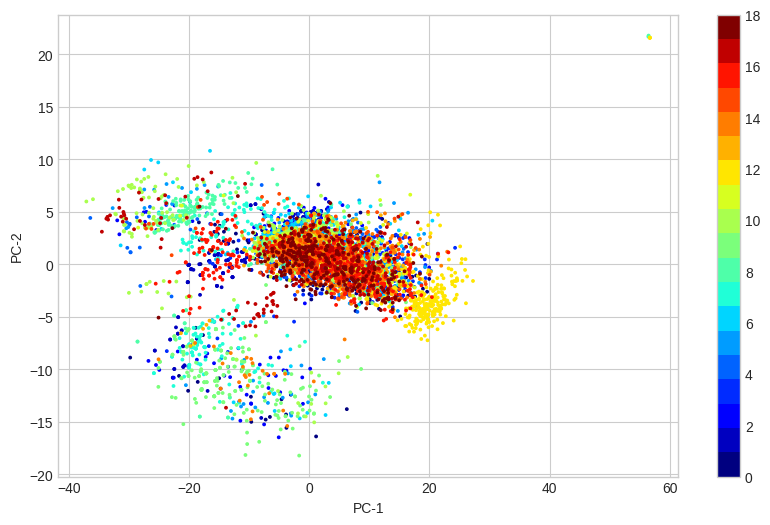

In [9]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 19)
plt.scatter(X_pca[1][:, 0], X_pca[1][:, 1], s = 3,
            cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show()

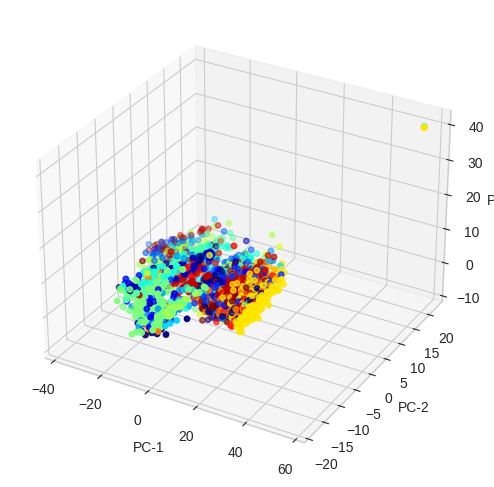

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pca[2][:, 0], X_pca[2][:, 1], X_pca[2][:, 2], s = 15,
            cmap = c_map , c = y)

ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')

plt.show()

KNN mit k zwischen 1 und 100 auf den transformierten Daten
LLOCV wäre gut dauert aber lange, deshalb CV
Als Ergebnis wird der Durchschnitt der jeweiligen Scores verwendet

In [11]:
k = range(1, 101)
scores_knn = []

for i, pca_data in enumerate(X_pca):
    scores_knn.append([])
    for n_neighbors in k:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_validate(knn, pca_data, y)
        scores_knn[i].append(np.mean(scores["test_score"]))

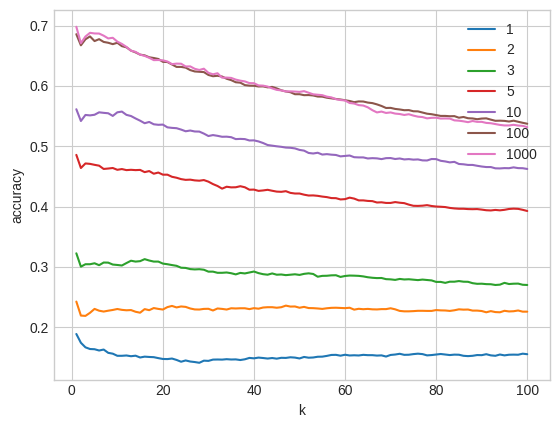

In [17]:
for elem in scores_knn:
    plt.plot(k, elem, label=dims[scores_knn.index(elem)])
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
plt.show()

Ergebnis von KNN: Mit vielen Dimensionen noch ordentliche Ergebnisse aber im niedrig-dimensionalen Raum nicht mehr praktikabel

Klassifikation mit Entscheidungsbäumen
Zuerst train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depths = range(1, 11)
criterions = ["gini", "entropy", "log_loss"]

scores_tree = []

for i, criterion in enumerate(criterions):
    scores_tree.append([])
    for max_depth in max_depths:
        tree = DecisionTreeClassifier(X_train, y_test,
                                      criterion=criterion,
                                      max_depth=max_depth)
        scores = cross_validate(tree, pca_data, y)
        scores_knn[i].append(np.mean(scores["test_score"]))